In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

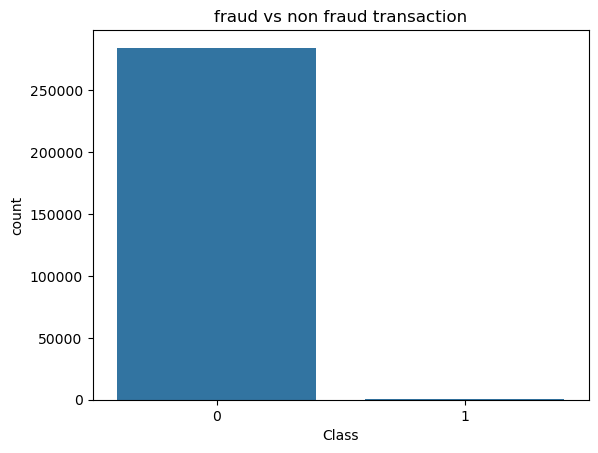

In [7]:
sns.countplot(x='Class',data=df)
plt.title("fraud vs non fraud transaction")
plt.show()

In [8]:
scaler=StandardScaler()
df['Time']=scaler.fit_transform(df[['Time']])
df['Amount']=scaler.fit_transform(df[['Amount']])

In [10]:
x = df.drop('Class', axis=1)
y = df['Class']

print(x.shape)
print(y.shape)


(284807, 30)
(284807,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.3,stratify=y,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(199364, 30) (85443, 30)
Class
0    199020
1       344
Name: count, dtype: int64
Class
0    85295
1      148
Name: count, dtype: int64


In [12]:
log=LogisticRegression(max_iter=1000)
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred=log.predict(x_test)
y_prob=log.predict_proba(x_test)[:,1]
print(classification_report(y_test,y_pred))
print("roc auc score :",roc_auc_score(y_test,y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

roc auc score : 0.9559805159517921


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(y_train.value_counts())
print(y_train_smote.value_counts())
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


Class
0    199020
1       344
Name: count, dtype: int64
Class
0    199020
1    199020
Name: count, dtype: int64


In [21]:
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(x_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_smote = lr_smote.predict(x_test)
y_prob_smote = lr_smote.predict_proba(x_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_smote))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC-AUC Score: 0.9659891030018235


In [23]:
# we use other models to get the better score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9275498944046339


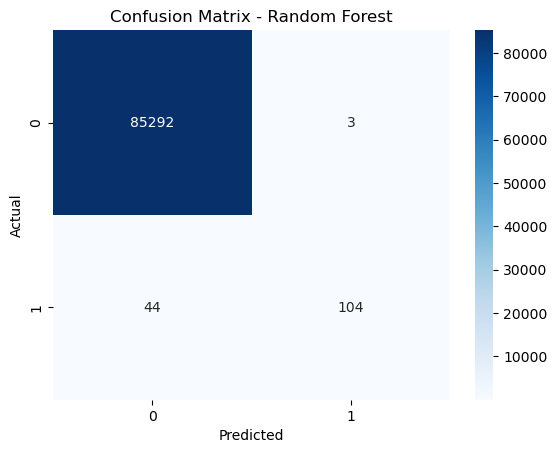

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
